In [1]:
import numpy as np
import pandas as pd

# Prediction of automobile price

In [2]:
#importing the dataset
data = pd.read_csv('../input/automobile-dataset/Automobile_data.csv')

#displaying what datset looks like
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# The first step in Machine learning is data cleaning.

So we will first check whether our dataset contains missing or null values.

Missing values are denoted using " ?" symbol while null values are denoted using "NaN"

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# No null values ??

As can be seen there are no null values in this dataset but..
if you see the output of first cell, it gives us a hint that our dataset has some missing values "?".

To confirm this we will print the value count of one of any columns.

Let's check "normalized-losses" feature with pandas function value_counts()

In [4]:
# pandas.DataFrame.value_counts() this funtion returns a series of all the distinct values and their counts
data['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
128     6
134     6
104     6
94      5
74      5
85      5
102     5
65      5
95      5
168     5
103     5
148     4
118     4
93      4
106     4
122     4
83      3
101     3
125     3
137     3
115     3
154     3
192     2
158     2
164     2
110     2
81      2
113     2
129     2
194     2
197     2
89      2
108     2
153     2
87      2
145     2
119     2
188     2
256     1
186     1
231     1
107     1
121     1
90      1
142     1
98      1
77      1
78      1
Name: normalized-losses, dtype: int64

# Our suspicion was right
The output shows that in "normalized-losses" feature we have around 41 missing values.

To handle this we will replace all the missing values in out dataset with np.nan 
using pandas function pd.DataFrame.replace()

In [5]:
data = data.replace("?", np.nan)

#checking for missing values again
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Now looking again at the info of our dataset we can see that it contains features that are of float datatype but are labled as objects

so we have to change them as well.

In [6]:
for col in data.select_dtypes(include="object"):
    try:
        data[col] = data[col].astype(str).astype(float)
    except:
        pass

# Now let's check our dataset

In [7]:
data.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# found anythiing intresting in this above output ?

If you look at two features, num-of-doors and num-of-cylinders features you will find out that these features contains numerical values but with string name. 

So we can just replace the names with values.

To do that first we have to check the different values it contains.

In [8]:
data['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [9]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [10]:
data['num-of-cylinders'] = data['num-of-cylinders'].replace({ 'four' : 4, 'six' : 6, 'five' : 5, 'eight' : 8, 'two' : 2, 'tweleve' : 12, 'three' : 3})
data['num-of-cylinders'].value_counts()

4         159
6          24
5          11
8           5
2           4
3           1
twelve      1
Name: num-of-cylinders, dtype: int64

In [11]:
data['num-of-doors'] = data['num-of-doors'].replace({ 'four' : 4, 'two' : 2})
data['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

# Now comes the part where we have to fill null values

For that lets check if the correlation between features can help us.

If some feature have better correlation with one another we can use them to fill null values in one of them.

<AxesSubplot:>

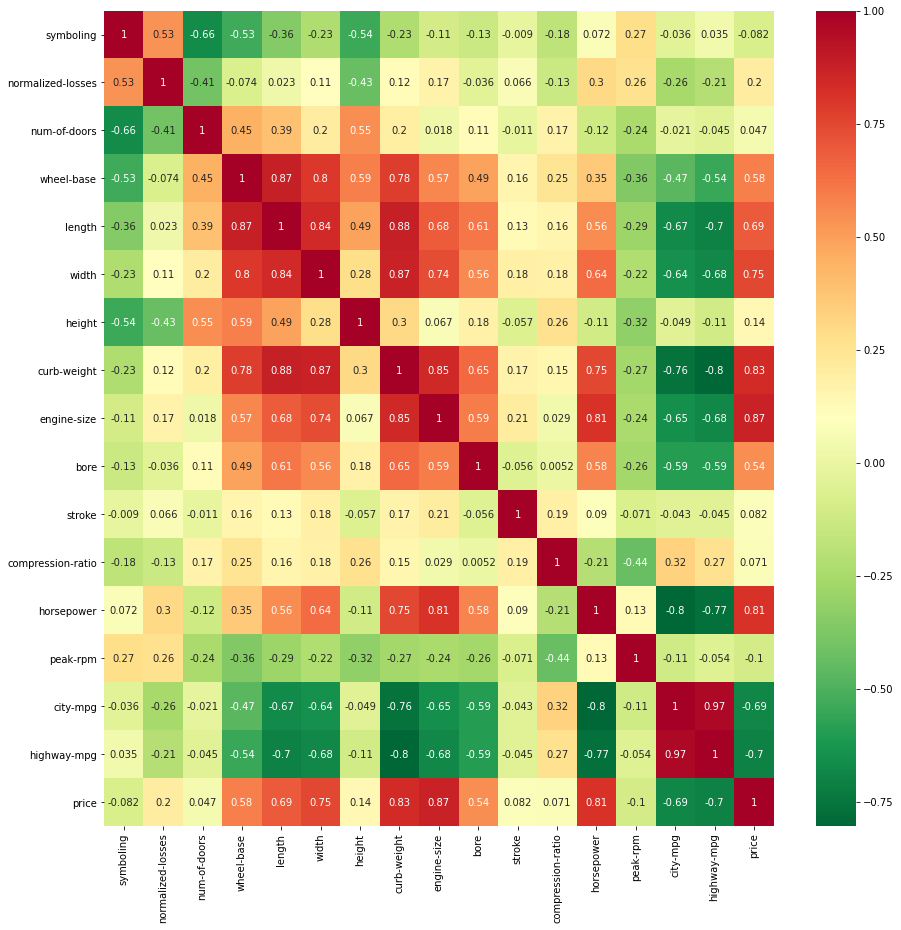

In [12]:
# importing the matplotlib and seaborn library for heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = 'RdYlGn_r', annot = True)

# Now lets think about this dataset

As we can know this dataset is based on real-world automobile information,
and that can help us fill the null values in some cases.


As a first assumption we make is using real-world data we come to know that,
most sedans as well as wagons have four doors most of the time while convertibles and hardtops have two doors.

To back up this assumption let's draw a graph.

<AxesSubplot:xlabel='body-style', ylabel='count'>

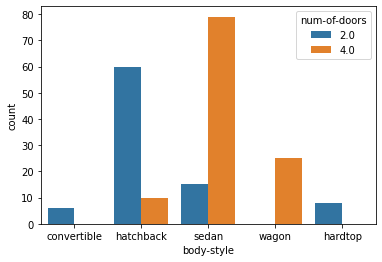

In [13]:
sns.countplot(data = data, x='body-style', hue='num-of-doors')

# so our assumption was mostly correct

We can see that since hatchbacks have more weight for 2 doors and sedans have 4 doors we will impute specific car type with these values.

i.e. 
fill convertible/hardtop with 2 doors
hatchback with 2, sedan and wagon with 4.

In [14]:
# prints the rows for which no-of-doors feature have null value
data[data['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Here we have only two rows for which no of doors is null.
And they are sedan so lets fill their null values with 4

In [15]:
# fillna funtion replaces all the null values of a feature with provided value
# here inplace variable is used that defines that chnages will happen in the dataset itself
# we don't need to fill the original dataset

data['num-of-doors'].fillna(4, inplace = True)